### Primary Modeling

**National Accounts**

- GDP
- Private consumption
- construction
- Facilities Investment
- Export of goods and services

**Labor**

- Unemployment rate
- Employment to population ratio
- Number of job opening per unemployment persons
- Employment rate
- Employed persons

**International Trade**
- Export
- Import
- Import price Index
- Export price Index

**Consumption Price**
- Retail Sales Index
- Consumer Price Index
- Producer Price Index
- Consumer Price Index (ex agricultural products & oils)
- Consumer Price Index (ex food & energy)

**Production, Manufacturing**
- Total Equipment Index
- Manufacturing Shipment Index
- Manufacturing Inventory Index
- Index of Services Production
- Index of Mining and Manufacturing Production

**Survey data**
- Sales Growth BSI (all industries)
- Business Condition BSI (all industries)
- Exports Growth BSI (manufacturing)
- Operation ratio BSI (manufacturing)
- New Orders Growth BSI (manufacturing)
- Domestic Sales Growth BSI (manufacturing)
- Economic Sentiment Index
- Current Economic Situation CSI
- Composite Consumer Sentiment Index

In [1]:
import pandas as pd
import numpy as np

consumption = pd.read_csv('../Cleaned_Data/consumption.csv', index_col = 0)
consumption.index = pd.to_datetime(consumption.index).strftime('%Y-%m')
consumption.index = pd.to_datetime(consumption.index)

production = pd.read_csv('../Cleaned_Data/production.csv', index_col = 0)
production.index = pd.to_datetime(production.index).strftime('%Y-%m')
production.index = pd.to_datetime(production.index)

facility = pd.read_csv('../Cleaned_Data/facility.csv', index_col = 0)
facility.index = pd.to_datetime(facility.index).strftime('%Y-%m')
facility.index = pd.to_datetime(facility.index)

construction = pd.read_csv('../Cleaned_Data/construction.csv', index_col = 0)
construction.index = pd.to_datetime(construction.index).strftime('%Y-%m')
construction.index = pd.to_datetime(construction.index)

sentiment = pd.read_csv('../Cleaned_Data/sentiment_index.csv', index_col = 0)
sentiment.index = pd.to_datetime(sentiment.index).strftime('%Y-%m')
sentiment.index = pd.to_datetime(sentiment.index)

labor = pd.read_csv('../Cleaned_Data/Labor.csv', index_col = 0)
labor.index = pd.to_datetime(labor.index).strftime('%Y-%m')
labor.index = pd.to_datetime(labor.index)

In [2]:
feature_matrix = {
    'consumption' : consumption,
    'production' : production,
    'facility_investment' : facility,
    'construction_investment' : construction,
    'sentiment_index' : sentiment,
    'labor' : labor
}

target

In [3]:
gdp = pd.read_csv('../Cleaned_Data/gdp_target.csv', index_col = 0)

In [4]:
gdp

,gdp_estimated
2001-01-31,0.000000
2001-02-28,1.639902
2001-03-31,0.748578
2001-04-30,0.355909
2001-05-31,-0.203525
...,...
2022-11-30,-0.059504
2022-12-31,0.007799
2023-01-31,0.171116
2023-02-28,0.202762


In [5]:
gdp.index = pd.date_range(start = '2001-01-01', end = '2023-04-01', freq = 'M').strftime('%Y-%m')

In [6]:
gdp.index = pd.to_datetime(gdp.index)

In [7]:
gdp

,gdp_estimated
2001-01-01,0.000000
2001-02-01,1.639902
2001-03-01,0.748578
2001-04-01,0.355909
2001-05-01,-0.203525
...,...
2022-11-01,-0.059504
2022-12-01,0.007799
2023-01-01,0.171116
2023-02-01,0.202762


#### Primary Modeling

In [8]:
train_matrix = pd.DataFrame(index = feature_matrix['consumption'].loc[:'2022-06'].index)
test_matrix = pd.DataFrame(index = feature_matrix['consumption'].loc['2022-07':].index)

In [9]:
train_matrix

""
2000-02-01
2000-03-01
2000-04-01
2000-05-01
2000-06-01
...
2022-02-01
2022-03-01
2022-04-01
2022-05-01


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = feature_matrix['consumption'].iloc[:,:-1]
y = feature_matrix['consumption']['estimated_consumption']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

consumption_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
consumption_model.fit(X_train, y_train)
y_pred = consumption_model.predict(X_test)
pred_train = consumption_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.514764182901511e-05


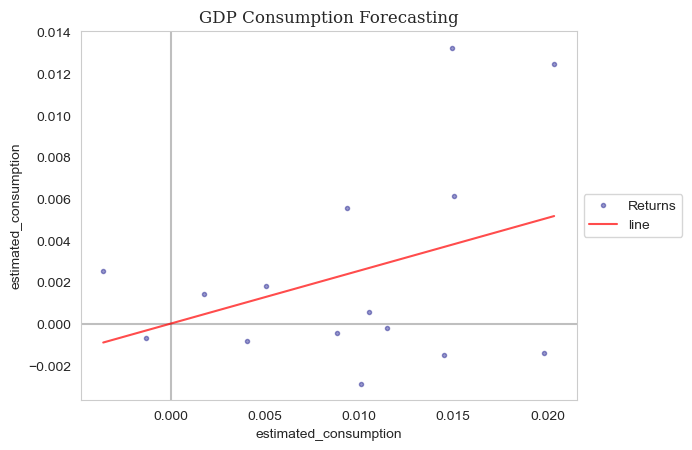

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Consumption Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [12]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'consumption')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'consumption')
], axis = 1)

In [13]:
X = feature_matrix['construction_investment'].iloc[:,:-1]
y = feature_matrix['construction_investment']['estimated_construction']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

construction_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
construction_model.fit(X_train, y_train)
y_pred = construction_model.predict(X_test)
pred_train = construction_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0002786472027504446


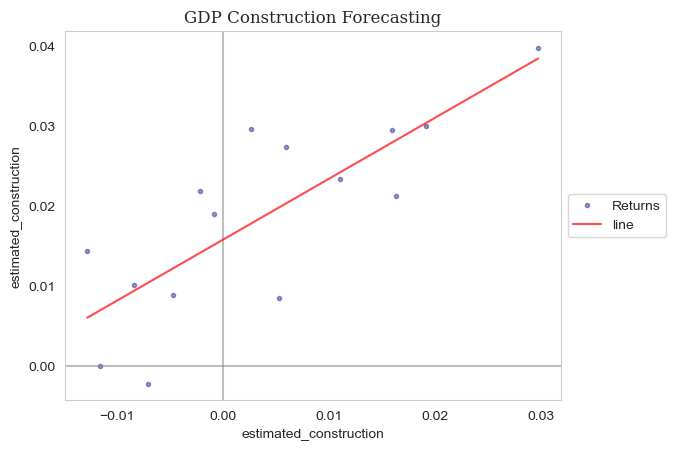

In [14]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Construction Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [15]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'construction')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'construction')
], axis = 1)

facility

In [16]:
X = feature_matrix['facility_investment'].iloc[:,:-1]
y = feature_matrix['facility_investment']['estimated_facility']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

facil_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
facil_model.fit(X_train, y_train)
y_pred = facil_model.predict(X_test)
pred_train = facil_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00037350912998660314


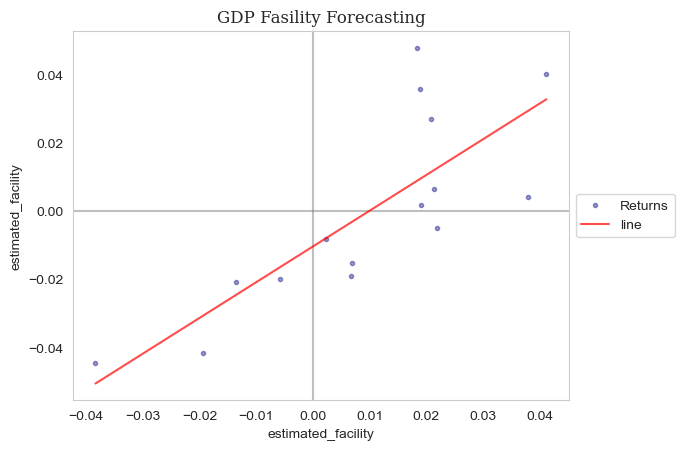

In [17]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Fasility Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [18]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'facility')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'facility')
], axis = 1)

production

In [19]:
feature_matrix['production']

,production_idx,mine_prod_idx,const_prod_idx,service_idx,admin_prod_idx,gen_machine_idx,elec_machine_idx,prec_machine_idx,other_device_idx,vehicle_idx,other_vehicle_idx
2001-01-01,0.025391,-0.042316,0.062374,0.054104,0.038820,-0.030675,-0.044747,0.087527,-0.125285,-0.159456,0.226562
2001-02-01,0.049689,0.055288,0.097308,0.048263,-0.018975,0.026365,-0.136861,0.108796,-0.021164,0.060000,-0.180851
2001-03-01,0.025688,0.014768,0.026941,0.036907,-0.023026,-0.040580,-0.140000,0.081522,-0.078054,-0.073514,0.099762
2001-04-01,0.056818,0.044643,0.057949,0.067766,0.023064,-0.226158,-0.130031,-0.062963,-0.062500,0.229462,-0.056000
2001-05-01,0.045290,0.016949,0.023384,0.068421,-0.003317,-0.205755,-0.101423,-0.080614,-0.054147,0.064010,0.497312
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,-0.014388,-0.075838,0.057173,0.011525,-0.022461,-0.051505,-0.091185,-0.057237,-0.081633,-0.029636,0.013746
2023-06-01,0.006130,-0.060315,0.088346,0.029772,0.017500,-0.082113,-0.114151,0.038903,-0.017719,0.211042,-0.011425
2023-07-01,-0.013624,-0.081344,0.101598,0.018733,-0.077833,-0.154225,-0.069094,-0.056187,-0.058072,-0.148571,-0.011244
2023-08-01,0.012975,-0.006579,0.107064,0.016949,0.002110,-0.237483,-0.053384,-0.086331,-0.057692,-0.213689,0.203827


In [20]:
X = feature_matrix['production'].iloc[:,1:]
y = feature_matrix['production']['production_idx']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

prod_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
prod_model.fit(X_train, y_train)
y_pred = prod_model.predict(X_test)
pred_train = prod_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0002610702832838553


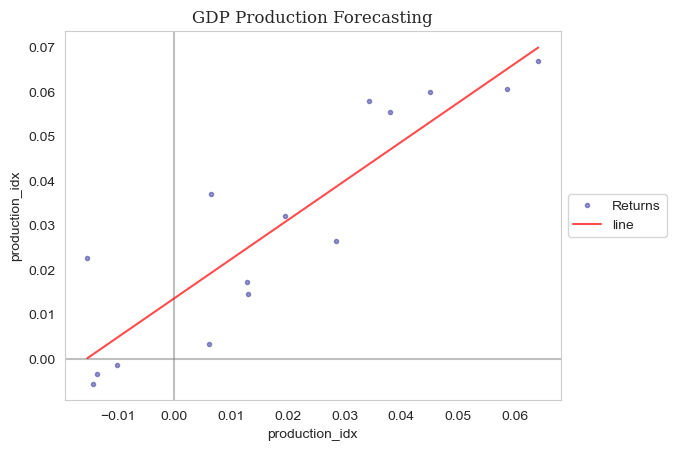

In [21]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.axvline(0, color = 'grey', alpha = 0.5)
plt.axhline(0, color = 'grey', alpha = 0.5)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Production Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [22]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'production')
], axis = 1, join = 'inner'
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'production')
], axis = 1, join = 'inner')

labor

In [23]:
feature_matrix['labor']

,unemployment_rate,employment_rate,eco_population,employment,inflation
2001-01-01,0.051,0.949468,0.007835,0.015240,0.034
2001-02-01,0.055,0.945409,0.009041,0.011614,0.036
2001-03-01,0.051,0.948929,0.012701,0.012708,0.040
2001-04-01,0.041,0.959111,0.023435,0.027563,0.048
2001-05-01,0.037,0.963172,0.021131,0.025630,0.053
...,...,...,...,...,...
2023-06-01,0.027,0.972787,0.008581,0.011728,0.027
2023-07-01,0.027,0.972638,0.006209,0.007410,0.023
2023-08-01,0.020,0.980411,0.007786,0.009433,0.034
2023-09-01,0.023,0.977486,0.009143,0.010884,0.037


In [24]:
X = feature_matrix['labor'].iloc[:,1:]
y = feature_matrix['labor']['unemployment_rate']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

labor_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
labor_model.fit(X_train, y_train)
y_pred = labor_model.predict(X_test)
pred_train = labor_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.773686249999582e-06


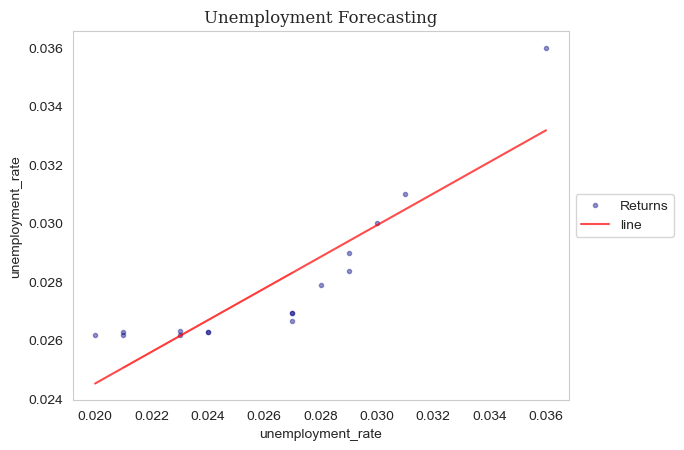

In [25]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Unemployment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [26]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'labor')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'labor')
], axis = 1)

Consumer Sentiment

In [27]:
feature_matrix['sentiment_index']

,crnt_living_cdsn_CSI,crnt_economic_jmt_CSI,job_oppr_prop_CSI,interest_prop_CSI,hus_hld_prop_CSI,hus_hld_exp_CSI,inflation_prop,econ_sent_idx_CSI,industry_BSI,large_corp_ind,mid_corp_ind,chemical_ind,light_ind,export_ind,domestic_ind,econ_sent_idx
2003-01-01,0.859058,0.979713,0.924742,0.846106,0.890581,1.050707,1.579245,1.001139,0.82,0.94,0.79,0.85,0.79,0.82,0.84,1.010
2003-02-01,0.855530,0.923110,0.902632,0.860674,0.911055,1.068228,1.582890,1.008628,0.73,0.84,0.74,0.79,0.72,0.80,0.76,1.023
2003-03-01,0.745413,0.707176,0.752626,0.783220,0.838364,0.971065,1.397865,0.900232,0.71,0.81,0.73,0.78,0.68,0.78,0.74,0.923
2003-04-01,0.750554,0.556794,0.703741,0.841899,0.915404,1.042238,1.437421,0.940696,0.76,0.84,0.79,0.84,0.67,0.88,0.78,0.980
2003-05-01,0.708490,0.427125,0.630779,0.818671,0.916128,1.026432,1.380056,0.912177,0.74,0.84,0.74,0.79,0.70,0.77,0.77,0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.890000,0.690000,0.810000,1.050000,0.980000,1.130000,1.460000,1.010000,0.76,0.75,0.71,0.76,0.64,0.67,0.78,0.957
2023-07-01,0.910000,0.750000,0.850000,1.120000,0.990000,1.130000,1.440000,1.030000,0.74,0.72,0.72,0.74,0.62,0.68,0.74,0.941
2023-08-01,0.910000,0.720000,0.840000,1.180000,1.000000,1.130000,1.470000,1.030000,0.71,0.70,0.64,0.68,0.63,0.64,0.69,0.940
2023-09-01,0.890000,0.660000,0.770000,1.180000,0.990000,1.120000,1.470000,1.000000,0.73,0.71,0.63,0.69,0.63,0.63,0.71,0.927


In [28]:
X = feature_matrix['sentiment_index'].iloc[:,:7]
y = feature_matrix['sentiment_index']['econ_sent_idx_CSI']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

csi_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
csi_model.fit(X_train, y_train)
y_pred = csi_model.predict(X_test)
pred_train = csi_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0012752550386765436


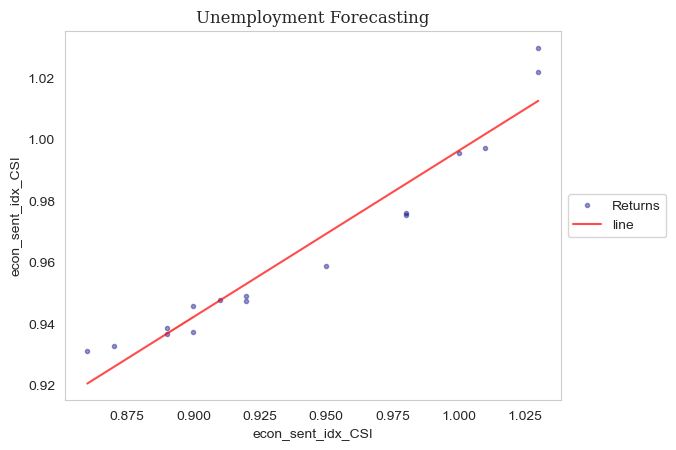

In [29]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Unemployment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [30]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'consumer_expectation')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'consumer_expectation')
], axis = 1)

bsi

In [31]:
X = feature_matrix['sentiment_index'].iloc[:,-7:-1]
y = feature_matrix['sentiment_index']['industry_BSI']

X_train, X_test, y_train, y_test = X.loc[:'2022-06'], X.loc['2022-07':], y.loc[:'2022-06'], y.loc['2022-07':]

bsi_model = RandomForestRegressor(n_estimators = 1000, 
                                          random_state = 42,
                                          criterion = 'squared_error',
                                          max_depth = 10)
bsi_model.fit(X_train, y_train)
y_pred = bsi_model.predict(X_test)
pred_train = bsi_model.predict(X_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.002253740283379136


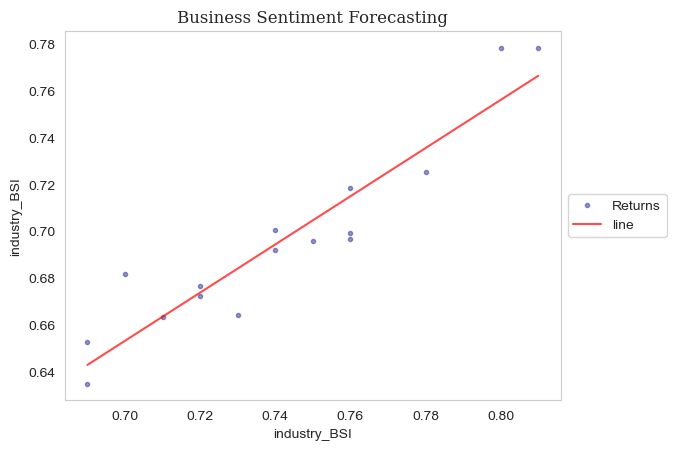

In [32]:
beta, alpha = np.polyfit(x = y_test , y = y_pred ,deg = 1)
plt.scatter(y = y_pred, x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('Business Sentiment Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [33]:
train_matrix = pd.concat([
    train_matrix,
    pd.Series(pred_train, index = X_train.index, name = 'business_expectation')
], axis = 1
)
test_matrix = pd.concat([
    test_matrix, 
    pd.Series(y_pred, index = X_test.index, name = 'business_expectation')
], axis = 1)

#### Secondary Modeling

In [34]:
gdp

,gdp_estimated
2001-01-01,0.000000
2001-02-01,1.639902
2001-03-01,0.748578
2001-04-01,0.355909
2001-05-01,-0.203525
...,...
2022-11-01,-0.059504
2022-12-01,0.007799
2023-01-01,0.171116
2023-02-01,0.202762


In [35]:
train_matrix.dropna()

,consumption,construction,facility,production,labor,consumer_expectation,business_expectation
2003-01-01,0.006335,0.024209,-0.029547,0.041935,0.037000,1.035255,0.819714
2003-02-01,0.001285,0.019726,0.044685,0.044862,0.038109,1.017356,0.737307
2003-03-01,0.002242,0.030419,0.018824,0.029716,0.036999,0.924592,0.721273
2003-04-01,-0.003596,0.016835,-0.002075,0.020079,0.034988,0.938998,0.760832
2003-05-01,-0.004648,0.029066,-0.018463,0.000666,0.034000,0.907870,0.742902
...,...,...,...,...,...,...,...
2022-02-01,0.011193,-0.010582,-0.018541,0.048076,0.034000,1.033862,0.851176
2022-03-01,0.011022,-0.012993,-0.032954,0.043880,0.030260,1.036658,0.820883
2022-04-01,0.013336,-0.011010,-0.044196,0.056557,0.030000,1.038070,0.846453
2022-05-01,0.014941,0.014562,0.019488,0.074351,0.030000,1.023689,0.832983


In [44]:
y_train, y_test = gdp.loc['2003':'2022-06'], gdp.loc['2022-07':]

model = RandomForestRegressor(n_estimators = 1000, 
                              random_state = 42,
                              criterion = 'absolute_error',
                              max_depth = 10)
model.fit(train_matrix.dropna().iloc[:,2:], y_train)
y_pred = model.predict(test_matrix.dropna().iloc[:,2:])

print(f"Mean Squared Error: {mse}")

/Users/junghunlee/anaconda3/envs/TimeSeriesModeling/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.002253740283379136


In [45]:
y_test

,gdp_estimated
2022-07-01,0.028802
2022-08-01,-0.034606
2022-09-01,-0.087946
2022-10-01,-0.192765
2022-11-01,-0.059504
2022-12-01,0.007799
2023-01-01,0.171116
2023-02-01,0.202762
2023-03-01,0.025032


In [46]:
y_pred[:9]

array([0.23232298, 0.43343804, 0.43156993, 0.42767711, 0.25076883,
       0.12331263, 0.27529029, 0.18190022, 0.14616491])

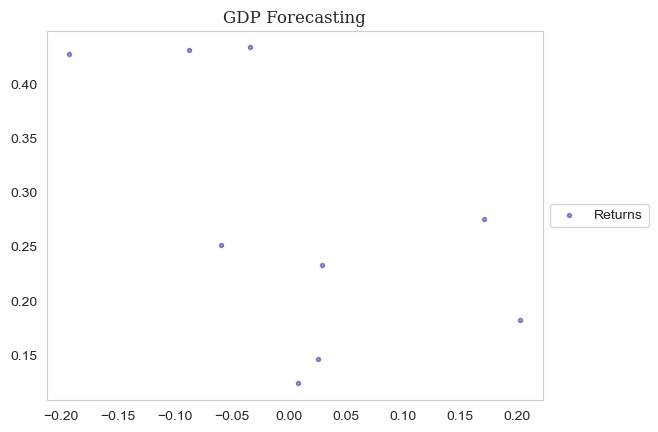

In [47]:
#beta, alpha = np.polyfit(x = y_test , y = y_pred[:9] ,deg = 1)
plt.scatter(y = y_pred[:9], x = y_test, label = 'Returns', marker = '.', color = 'navy', alpha = 0.4)
#sns.lineplot(x = y_test, y = alpha + y_test * beta, color = 'red', label = 'line', alpha = 0.7)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('GDP Forecasting', fontfamily = 'Serif')
plt.grid(False)
plt.show()

In [48]:
gdp_real = pd.read_excel('../Data/GDP 성장률.xlsx', index_col = 0)
gdp_real.index = pd.date_range(start = '2000-01-01', end = '2023-11-01', freq = 'Q')

Text(0.5, 1.0, 'GDP Forecasting')

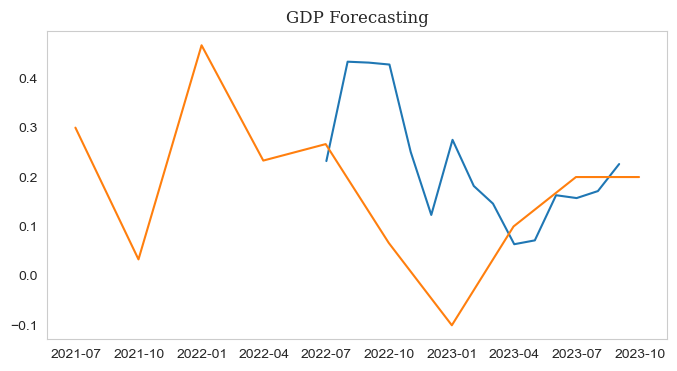

In [53]:
plt.figure(figsize = (8, 4))
plt.plot(pd.Series(y_pred, index = X_test.index[:-1]))
plt.plot(gdp_real["전기대비(좌축)"][-10:] / 3)
plt.grid(False)
plt.title('GDP Forecasting', fontfamily = 'Serif')

In [42]:
#train_matrix.to_csv('../Cleaned_Data/train_matrix.csv')

In [43]:
#test_matrix.to_csv('../Cleaned_Data/test_matrix.csv')